<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 8

### Problem 0 (3 points)

Group Members: Beck Addison, Shivam Kaul, Gin Wang

## Part 1: Camera Transformations

### Problem 1.1 (Exam Style)

The translation vector from $a$ to $b$ can be given as the following:

$$ 
t_{ab} = t_b - t_a = \begin{bmatrix}
4\\
1\\
0
\end{bmatrix} - 
\begin{bmatrix}
2\\
1\\
0
\end{bmatrix} = \begin{bmatrix}
2\\
0\\
0
\end{bmatrix}
$$
<br>

The rotation matrix $R_{ab}$ can be obtained using composite matrix operations:

$$
R_{ab} = \begin{bmatrix}
C_{a+b} & -S_{a+b} & 0\\
S_{a+b} & C_{a+b} & 0\\
0 & 0 & 1
\end{bmatrix} = \begin{bmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}
$$<br>

The essential matrix $E$, is given by the following formula:
$$ 
E = R_{ab}[t_{ab}]_X = \begin{bmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}\begin{bmatrix}
0 & 0 & 0\\
0 & 0 & -2\\
0 & 2 & 0
\end{bmatrix} = \begin{bmatrix}
0 & 0 & 2\\
0 & 0 & 0\\
0 & 2 & 0
\end{bmatrix}
$$

## Part 2: Epipolar Geometry 

### Problem 2.1 (Exam Style)

From the essential matrix $E$ given in the question:

$$
E = \begin{bmatrix}
1 & 0 & -1\\
0 & 0 & 0\\
1 & 0 & 1
\end{bmatrix}
$$
<br>
Two unit vectors $t_1$ and $t_2$ can be obtained by taking the Singular Value Decomposition of E and then taking the last column of the vector $V$ but with sign ambiguity.

<br>
$$
E = USV^T
$$
$$
t = V[:,-1]
$$

Therefore, $t_1$ and $t_2$ are respectively
$$
\begin{bmatrix}
0\\
1\\
0
\end{bmatrix},\begin{bmatrix}
0\\
-1\\
0
\end{bmatrix}
$$

### Problem 2.2 (Exam Style)

For the case when:
$$
t_1 =\begin{bmatrix}
0\\
1\\
0
\end{bmatrix}
$$

We can obtain $R_1$ by the following method:

Say that

$$
R_1 = \begin{bmatrix}
r_{11} & r_{12} & r_{13}\\
r_{21} & r_{22} & r_{23}\\
r_{31} & r_{32} & r_{33}
\end{bmatrix} 
$$

Then:

$$
E = R_1[t_1]_X
$$

<br>

$$
\begin{bmatrix}
1 & 0 & -1\\
0 & 0 & 0\\
1 & 0 & 1
\end{bmatrix} 
= 
\begin{bmatrix}
r_{11} & r_{12} & r_{13}\\
r_{21} & r_{22} & r_{23}\\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
\begin{bmatrix}
0 & 0 & 1\\
0 & 0 & 0\\
-1 & 0 & 0
\end{bmatrix}
$$

<br>
Solving for $R_1$ with the constraint that the columns need to be orthogonal to each other and unit norm:

$$
R_1 = \begin{bmatrix}
\frac{-1}{\sqrt{2}} & 0 & \frac{-1}{\sqrt{2}}\\
0 & 1 & 0\\
\frac{1}{\sqrt{2}} & 0 & \frac{-1}{\sqrt{2}}
\end{bmatrix}
$$

Similarly, for the case when:
$$
t_1 =\begin{bmatrix}
0\\
-1\\
0
\end{bmatrix}
$$

Then
$$
R_2 = \begin{bmatrix}
\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 1 & 0\\
\frac{-1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$

### Problem 2.3 (Exam Style)

From the formula:
$$b^{T}Ea = 0$$
<br>

$$
\begin{bmatrix}
3 &
2 &
1
\end{bmatrix}

\begin{bmatrix}
1 & 0 & -1\\
0 & 0 & 0\\
1 & 0 & 1
\end{bmatrix}

\begin{bmatrix}
x_1\\
x_2\\
1
\end{bmatrix} = 0
$$

<br>

$$
\begin{bmatrix}
4 &
0 &
-2
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
1
\end{bmatrix} = 0
$$

Therefore, the equation of the epipolar line is:

$$2x_1 - 1 = 0$$

## Part 3: 3D Reconstruction

In [59]:
import urllib.request
import pickle
from os import path as osp


def retrieve(file_name, semester='spring21', homework=8):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        urllib.request.urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [60]:
modules = ('geometry', 'camera', 'labels', 'longuet_higgins', 'rubik', 'experiments')
for module in modules:
    retrieve('{}.py'.format(module))

Using previously downloaded file geometry.py
Using previously downloaded file camera.py
Using previously downloaded file labels.py
Using previously downloaded file longuet_higgins.py
Using previously downloaded file rubik.py
Using previously downloaded file experiments.py


In [61]:
import numpy as np
from rubik import new_cube, draw_cube
from camera import print_camera
from labels import labels as lab
from experiments import camera_pair, standard_camera
from experiments import experiment, print_features, print_stats
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

Extrinsic parameters:
	Origin (t): [115.47 115.47 115.47] mm
	Rotation matrix (R): 
		[-0.707  0.707  0.   ]
		[ 0.408  0.408 -0.816]
		[-0.577 -0.577 -0.577]

Intrinsic parameters:
	Focal distance (f): 8.585 mm
	Scaling (s): [200. 200.] pixels per mm
	Principal point (pi): [960. 540.] pixels


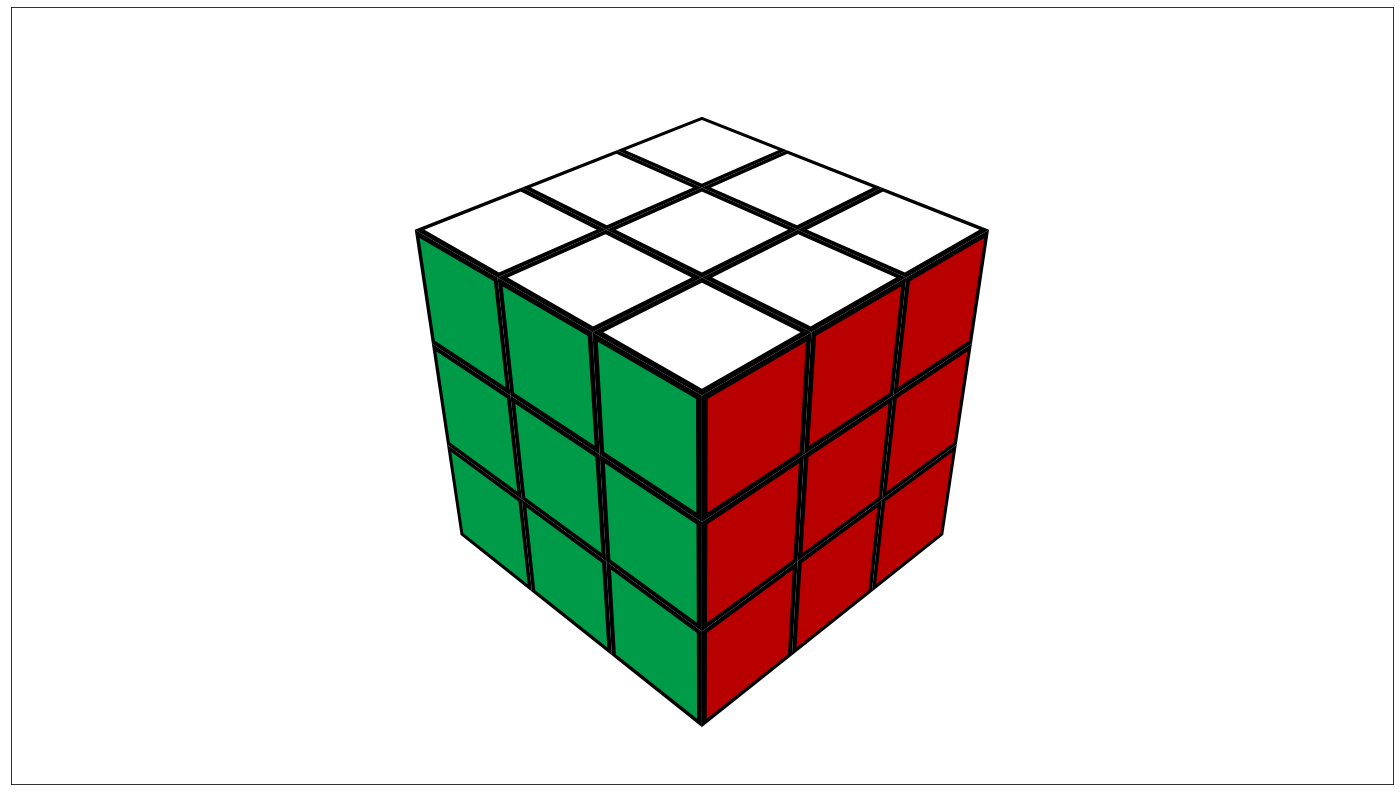

In [62]:
rubik = new_cube()
t_mm = 200. * np.ones(3) / np.sqrt(3.)
camera = standard_camera(t_mm)
print_camera(camera)
features = draw_cube(rubik, camera)

In [63]:
height_mm, circle_radius_mm = 100., 150.

vergence_degrees = 30.
stats_30 = experiment(rubik, omega_degrees=vergence_degrees,
                      height_mm=height_mm,
                      circle_radius_mm=circle_radius_mm,
                      sigma_pixels=1., repetitions=1, display=False)
print_stats(stats_30)

distance (mm): 180.278
vergence angle (degrees): 30.000
noise sigma (pixels): 1.000
translation error (degrees): median 0.673, median distance from median 0.000
rotation error (degrees): median 0.163, median distance from median 0.000
structure RMS error (baseline units): median 0.005, median distance from median 0.000


### Problem 3.1

In [64]:
sigma_pixel = (0.1, 0.2, 0.5, 1., 1.5)
omega_degrees = np.linspace(15., 50., 8)

stats_log = [] # a list of dicts

for sigma_setting in sigma_pixel:
    for omega_setting in omega_degrees:
        logged_data = experiment(rubik, sigma_pixels=sigma_setting, omega_degrees=omega_setting)
        stats_log.append(logged_data)

In [67]:
import pandas as pd
stats_array = np.array(pd.json_normalize(stats_log))

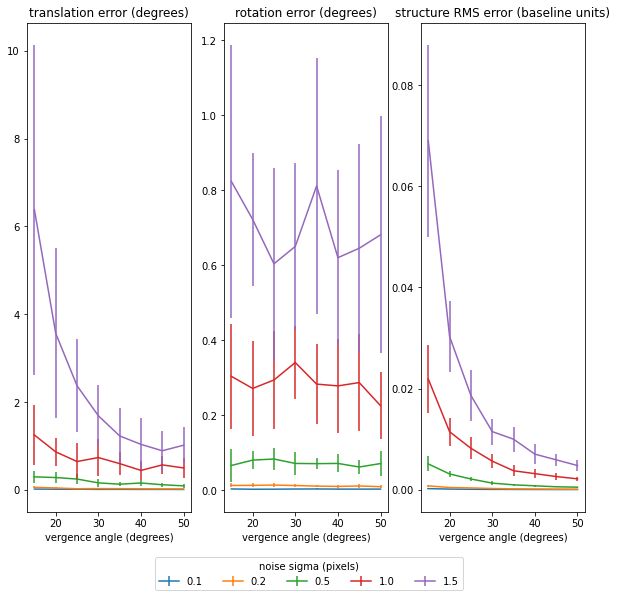

In [74]:
for k, error_type in enumerate([lab.translation, lab.rotation, lab.structure]):
    plt.subplot(1, 3, k + 1)
    for sigma in sigma_pixel:
        
        data_subset = stats_array[np.where(stats_array[:,2] == sigma)]

        # couldn't figure out how to use the namespace names for indexing
        # but this works too, not as elegant though

        median_idx = (k*2) + 3
        err_idx = (k*2) + 4

        x, y, yerr = data_subset[:, (1, median_idx, err_idx)].T

        plt.errorbar(x, y, yerr = yerr)
        plt.title(error_type)
        plt.xlabel(lab.vergence)

plt.figlegend(sigma_pixel, loc = "lower center", title = lab.noise, ncol = len(sigma_pixel))
plt.gcf().set_size_inches(10, 9, forward = True)

### Problem 3.2 (Exam Style)

Based on the data gathered from the experiments conducted above, we can make the following conclusions:

* 3D reconstruction is sensitive to noise - each error type is reduced by a lower noise sigma by what appears to be a nonlinear factor. However, as vergence angle increases, the effect of noise on the error values is reduced.

* Results get worse with smaller vergence (and conversely, get better with greater vergence) as the effect of any error or noise on the reconstruction of the image is magnified when the cameras are closer together (i.e. have a smaller vergence angle) and less significant when the two cameras have very different angles. Consider a situation in which two very poor cameras, situated next to each other around a subject, take two noisy (grainy) pictures of that subject. The noise of the two photographs add a large amount of uncertainty around the limits of the subject (the foreground) and the background, making the overall error possible during the reconstruction of the subject in 3D more erroneous due to that noise. In contrast, those same cameras situated at opposite or near-opposite ends of the subject might take similarly noisy pictures, but the perspectives are so different that 3D reconstruction of the subject involves two almost completely different images with much less overlap that could be incorrectly stitched together due to noise. Thus, a lower vergence angle results in higher error, particularly when images are noisy, and results in lower error, despite a noisy image.

* From the graphs, the highest degree of correlation occurs between translation error and structure RMS error.

### Problem 3.3

In [77]:
print_stats(experiment(rubik, sigma_pixels = 1., omega_degrees = 50))
print("--------------------")
print_stats(experiment(rubik, sigma_pixels = 1.0, omega_degrees = 55))

distance (mm): 180.278
vergence angle (degrees): 50.000
noise sigma (pixels): 1.000
translation error (degrees): median 0.570, median distance from median 0.247
rotation error (degrees): median 0.321, median distance from median 0.140
structure RMS error (baseline units): median 0.002, median distance from median 0.000
--------------------
distance (mm): 180.278
vergence angle (degrees): 55.000
noise sigma (pixels): 1.000
translation error (degrees): median 61.635, median distance from median 4.735
rotation error (degrees): median 72.725, median distance from median 0.907
structure RMS error (baseline units): median 0.857, median distance from median 0.041


The results above are vastly different from each other - the median error values for all error statistics are markedly higher, as well as the median distance from that median error (representing greater variability). This is all to imply that this vergence of 55 degrees not only imparts less accuracy than the 50 degree set, but also imparts less precision, resulting in more erroneous image reconstruction than before. The most likely reason for this drastic change is that the two cameras have been situated at different faces of the cube in the 55 degree case, or at least are further from looking at the same face (in other words, one camera might be looking at one face of the cube and only a small part of the other camera's face, while the other camera only sees a small part of that first camera's face). This cube has, in a sense, discontinuous sides - the faces do not smoothly transition into one another, so the number of correspondences is likely to drop sharply as cameras view different faces of the same cube, to the point where there are not enough correspondences to reconstruct the images into a 3D figure due to an inability to "stitch" the images together.

## Part 4: Camera Calibration 

Using previously downloaded file circles.png


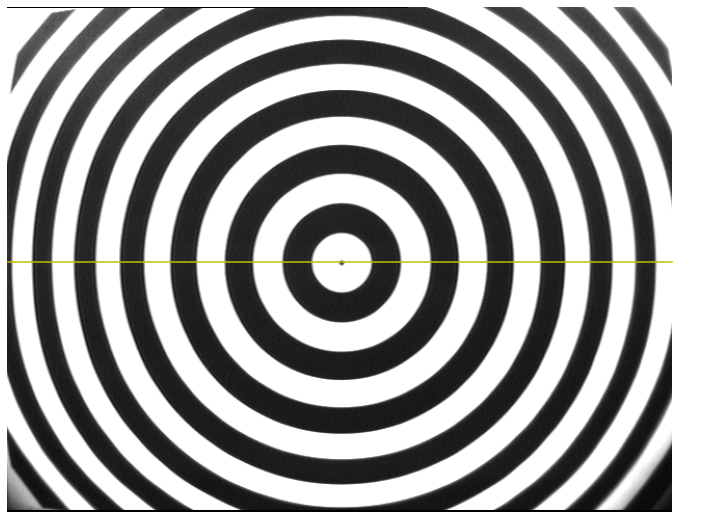

In [32]:
from imageio import imread

principal_point = np.array((321, 245))

def show_circles():
    plt.figure(figsize=(10, 7.6))
    plt.imshow(circles, cmap='gray')
    plt.plot([0, circles.shape[1]], 2 * [principal_point[1]], 'y')
    plt.axis('off')
    plt.tight_layout();

circles_name = 'circles.png'
retrieve(circles_name)
circles = imread(circles_name)
show_circles()

### Problem 4.1

In [ ]:
retrieve('pick.py')

In [37]:
distorted = pickle.load(open('points.pkl', 'rb'))

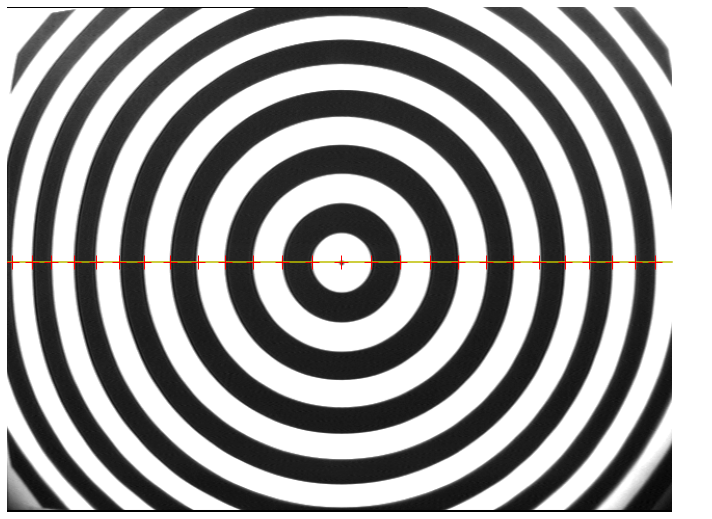

In [38]:
show_circles()
plt.plot(distorted, np.repeat(principal_point[1], len(distorted)), 
         linestyle = 'None', marker = "+", color = "red", markersize = 14)

### Problem 4.2

In [39]:
def true_centered_coordinates(x, left_index, right_index):
    radius = np.round((x[right_index] - x[left_index]) / 2.)
    return np.arange(-13, 13) * radius

In [40]:
ideal_centered = true_centered_coordinates(distorted, 12, 14)

distorted_centered = distorted - principal_point[0]

print(ideal_centered)
print(distorted_centered)

d = distorted_centered - ideal_centered

[-364. -336. -308. -280. -252. -224. -196. -168. -140. -112.  -84.  -56.
  -28.    0.   28.   56.   84.  112.  140.  168.  196.  224.  252.  280.
  308.  336.]
[-317 -298 -279 -257 -236 -214 -190 -165 -138 -112  -85  -57  -28    0
   29   57   86  113  140  166  191  216  239  261  283  302]


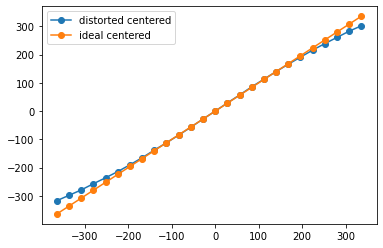

In [41]:
plt.plot(ideal_centered, distorted_centered, '-o') #distorted centered
plt.plot(ideal_centered, ideal_centered,'-o') #ideal centered
plt.legend({'ideal centered', 'distorted centered'})
plt.show()

This is barrel distortion, since distorted coordinates grow sub-linearly.

### Problem 4.3

In [42]:
def calibrate(distort, ideal):
    m = np.vstack([ideal.T, ideal.T**3, ideal.T**5]).T
    return np.linalg.lstsq(m,distort-ideal,None)

In [43]:
np.set_printoptions(precision=3)
k = calibrate(distorted_centered, ideal_centered)[0]
print(k)

[ 1.980e-02 -1.278e-06  1.271e-12]


In [78]:
residual = distorted_centered-ideal_centered*(1+k[0]+k[1]*ideal_centered**2+k[2]*ideal_centered**4)

TypeError: 'int' object is not subscriptable

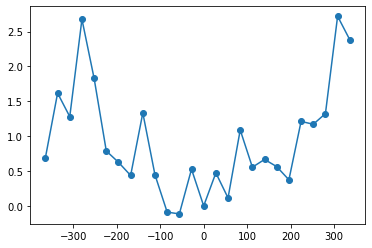

In [45]:
plt.plot(ideal_centered,residual,'-o')

### Problem 4.4

Downloaded file lab.png


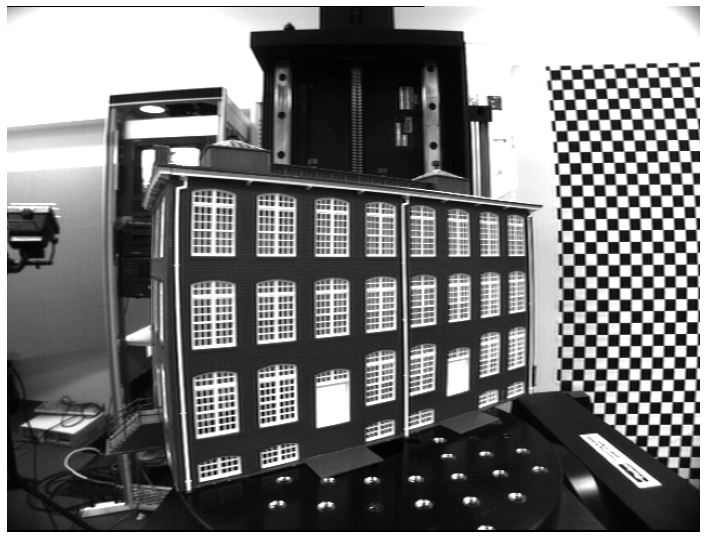

In [50]:
lab_name = 'lab.png'
retrieve(lab_name)
lab = imread(lab_name)

plt.figure(figsize=(10, 7.6))
plt.imshow(lab, cmap='gray')
plt.axis('off')
plt.tight_layout()

In [48]:
retrieve('interpolate.py')
from interpolate import interpolate

Downloaded file interpolate.py


In [46]:
def undistort(image,k,center):
    y, x = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]), indexing='ij')
    x = x-center[0]
    y = y-center[1]
    r = np.sqrt(x**2+y**2)
    delta = 1 + k[0] + k[1]*r**2 + k[2]*r**4
    xd = x*delta + center[0]
    yd = y*delta + center[1]
    
    return interpolate(xd, yd, image.astype(float))

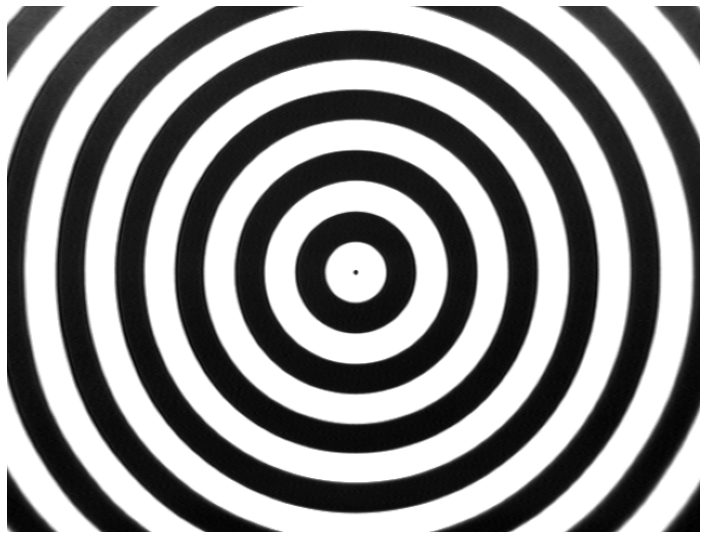

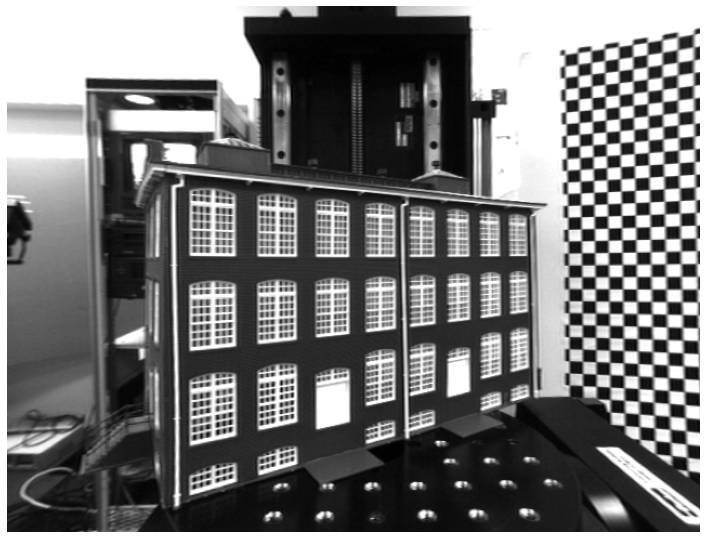

In [51]:
undis_circle = undistort(circles, k, principal_point)
undis_lab = undistort(lab, k, principal_point) 

plt.figure(figsize=(10, 7.6))
plt.imshow(undis_circle, cmap='gray')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10, 7.6))
plt.imshow(undis_lab, cmap='gray')
plt.axis('off')
plt.tight_layout()